# <a id='Part2'>$\color{red}{\text{DATA ANALYSIS OF GLOBAL TERRORISM}}$</a>

**Contents**
- <a href='#Getting Data Ready'> 1. Getting Data Ready</a>
- <a href='#Displaying the different features of the DataSet2'> 2. Displaying the different features of the DataSet</a>
- <a href='#Data Cleaning and Munging'>3. Data Cleaning and Munging</a>
- <a href='#Some Basic Analysis on Global Terror Attacks'> 4. Some Basic Analysis on Global Terror Attacks</a>
- <a href='#Terrorism in India'>5. Terrorism in India</a>
    - <a href='#History of Terrorism in India'>5.1 History of Terrorism in India</a>
    - <a href='#Most Active Terrorist group in India '>5.2 Most Active Terrorist group in India </a>
    - <a href='#Most Affected City in India '>5.3 Most Affected City in India </a>
    - <a href='#Favourite Target of top 10 Terrorist Group in India'>5.4 Favourite Target of top 10 Terrorist Group in India</a>
- <a href='#Terrorism in Pakistan'>6. Terrorism in Pakistan</a>
- <a href='#Terrorism in Afghanistan'>7. Terrorism in Afghanistan</a>
- <a href='#Terrorism in Iraq'>8. Terrorism in Iraq</a>
- <a href='#Terrorism in Syria'>9. Terrorism in Syria</a>
- <a href='#Terrorism in Nigeria'>10. Terrorism in Nigeria</a>

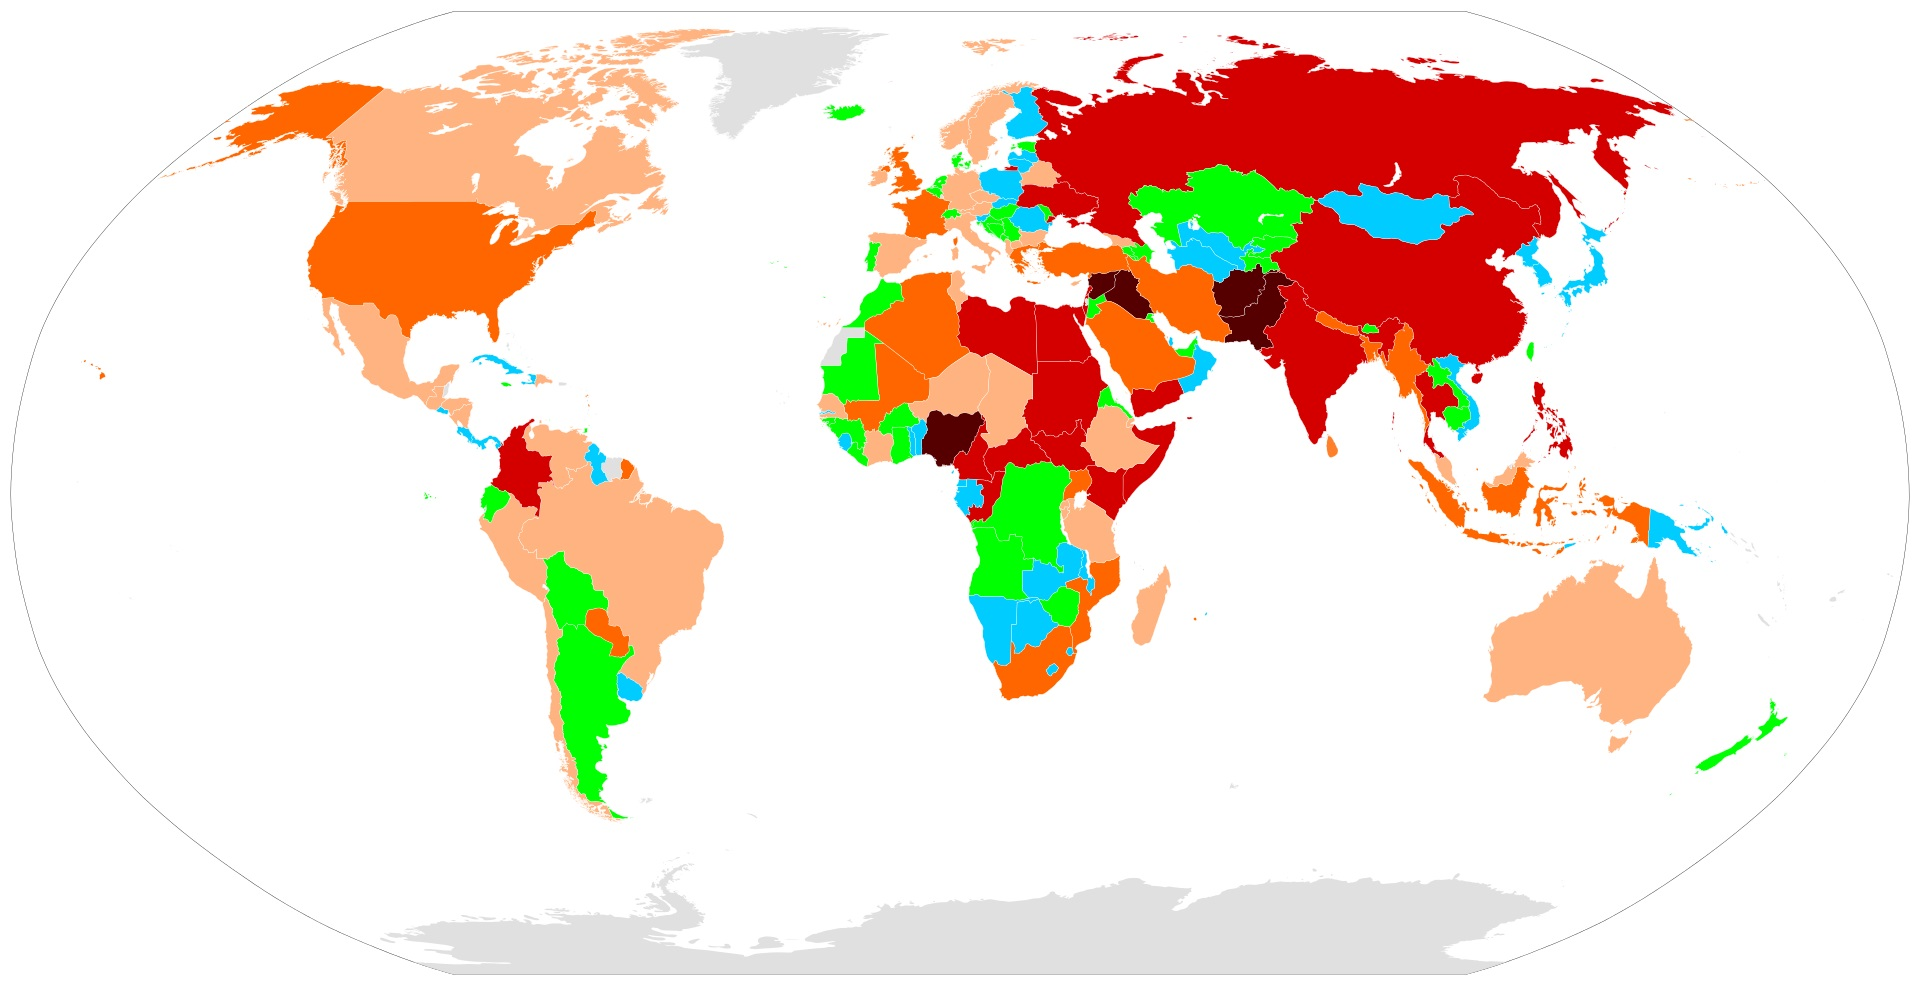

Terrorism causes significant threat to the international security, political and social stability, and economic development of a country. Till date, terrorism has not been completely abolished from the world. Still the terrorist groups exist and still we hear of deadly incidents.  
A detailed analysis on such attacks occuring from 2012 to 2016, terrorist groups prevalent across countries, and other important attributes of the attacks is made below. The analysis helps to understand the nature and severity of the attacks, behavioural aspects of several terrorist groups and their favourite target spots.

### <a id='Getting Data Ready'>1. Getting Data Ready</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy

In [2]:
try:
    data = pd.read_csv('E:\DataSet.csv')
    print('File successfully loaded into the DataFrame..')
except:
    print("File not found...")

File successfully loaded into the DataFrame..


### <a id='Displaying the different features of the DataSet2'>2. Displaying the different features of the DataSet</a>

In [3]:
data.head(3)

,iyear,imonth,iday,country_txt,city,attacktype1_txt,targtype1_txt,corp1,target1,natlty1_txt,gname,weaptype1_txt,weapsubtype1_txt,weapdetail,nkill,nwound,propextent_txt,ransomamt
0,2012,1,1,Kenya,Garissa,Armed Assault,Business,Locus Pub,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,Two grenades and AK-47 assault rifles were use...,3.0,14.0,Minor (likely < $1 million),NaN
1,2012,1,1,Pakistan,Sui,Bombing/Explosion,Military,Frontier Corps (FC),Soldiers,Pakistan,Baloch Republican Army (BRA),Explosives/Bombs/Dynamite,Land Mine,NaN,4.0,3.0,Minor (likely < $1 million),NaN
2,2012,1,1,Kenya,Garissa,Armed Assault,Business,Unknown,Bar,Kenya,Al-Shabaab,Explosives/Bombs/Dynamite,Grenade,NaN,2.0,14.0,Minor (likely < $1 million),NaN


In [4]:
data.shape

(43915, 18)

In [5]:
data.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'city', 'attacktype1_txt',
       'targtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname',
       'weaptype1_txt', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nwound',
       'propextent_txt', 'ransomamt'],
      dtype='object')

In [6]:
data.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country',\
               'attacktype1_txt':'attack','targtype1_txt':'target', 'corp1':'target_inst',\
               'target1':'target_pop', 'natlty1_txt':'nationality','gname':'group',\
               'weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype',\
               'nkill':'kill','nwound':'wound','propextent_txt':'property_damg', \
               'ransomamt':'ransom'}, axis='columns',inplace=True)

In [7]:
data.columns

Index(['year', 'month', 'day', 'country', 'city', 'attack', 'target',
       'target_inst', 'target_pop', 'nationality', 'group', 'weapon_type',
       'weapon_subtype', 'weapdetail', 'kill', 'wound', 'property_damg',
       'ransom'],
      dtype='object')

In [8]:
data.info()  # General information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43915 entries, 0 to 43914
Data columns (total 18 columns):
year              43915 non-null int64
month             43915 non-null int64
day               43915 non-null int64
country           43915 non-null object
city              43915 non-null object
attack            43915 non-null object
target            43915 non-null object
target_inst       43915 non-null object
target_pop        43915 non-null object
nationality       43342 non-null object
group             43915 non-null object
weapon_type       43915 non-null object
weapon_subtype    39346 non-null object
weapdetail        16985 non-null object
kill              41290 non-null float64
wound             39313 non-null float64
property_damg     15615 non-null object
ransom            273 non-null float64
dtypes: float64(3), int64(3), object(12)
memory usage: 6.0+ MB


### <a id='Data Cleaning and Munging'>3. Data Cleaning and Munging</a>

In [9]:
data.isnull().sum() # Sum of null values in each column

year                  0
month                 0
day                   0
country               0
city                  0
attack                0
target                0
target_inst           0
target_pop            0
nationality         573
group                 0
weapon_type           0
weapon_subtype     4569
weapdetail        26930
kill               2625
wound              4602
property_damg     28300
ransom            43642
dtype: int64

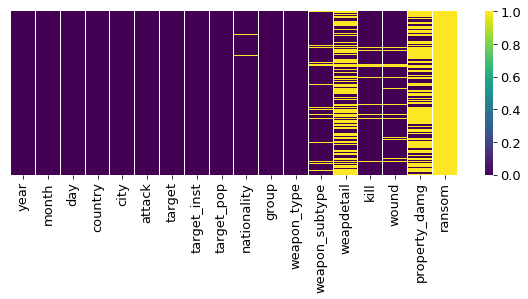

In [10]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

* Most of the ransom amounts, property-damage extents, weapon details have null values
* Most terrorists were interested in mass killing than procuring money to release hostage!

### 3.1 Dealing with duplicates in the data set

In [11]:
print('No. of duplicates in data: ',data.duplicated().sum())

No. of duplicates in data:  1967


In [12]:
data.drop_duplicates(inplace=True)   # Dropping the duplicated items

In [13]:
print('No. of duplicates in data: ',data.duplicated().sum())

No. of duplicates in data:  0


### 3.2 Dealing with null values in weapdetail, ransom and property_damp column

Since there are many null values in weapdetail, ransom and property_damp, we cannot drop those rows. Hence we fill those null values.

In [14]:
data['weapdetail'].fillna('Unknown', inplace = True)
data['ransom'].fillna(0, inplace = True)
data['property_damg'].fillna('no record', inplace = True)

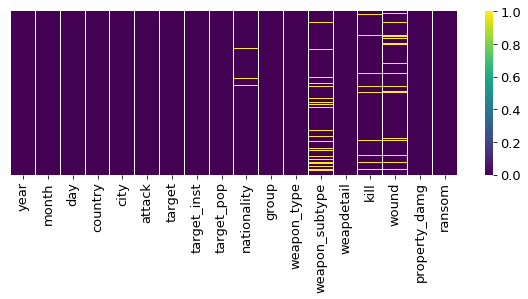

In [15]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 3.3 Dealing with the null values of nationality

In [16]:
data[['country','nationality']].head(10)

,country,nationality
0,Kenya,Kenya
1,Pakistan,Pakistan
2,Kenya,Kenya
3,Afghanistan,International
4,Democratic Republic of the Congo,Democratic Republic of the Congo
5,United States,United States
6,India,India
7,Afghanistan,Afghanistan
8,Senegal,Senegal
9,Somalia,Somalia


It seems values in country and nationality are same. So assuming nationality of the groups are same as their nationality, we deal with the null values of nationality by replacing them with country.

In [17]:
def impute_nationality(cols):
    Country = cols[0]
    Nationality = cols[1]
    if pd.isnull(Nationality):
        return Country
    else:
        return Nationality

In [18]:
data['nationality'] = data[['country','nationality']].apply(impute_nationality, axis = 1)

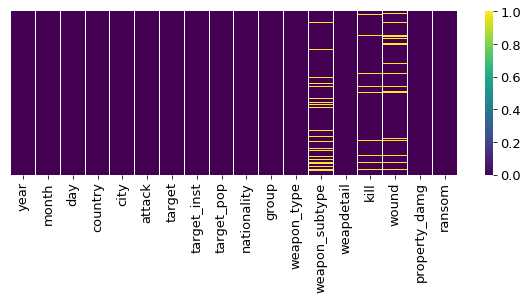

In [19]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 3.4 Dealing with null values in weapon_subtype column

In [20]:
data.weapon_subtype.isnull().sum()

4403

Since there are many null values in weapon_subtype too and it is not a very important factor of an attack, we cannot drop those rows. Hence we fill those null values.

In [21]:
data['weapon_subtype'].fillna('Unknown', inplace = True)

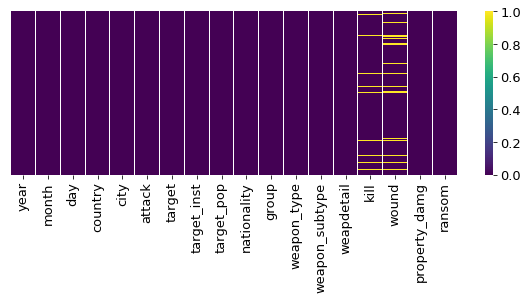

In [22]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 3.5 Dealing with null values  in kill and wound column

In [23]:
data[(data.kill.isnull())&(data.wound.isnull())].count()

year              2345
month             2345
day               2345
country           2345
city              2345
attack            2345
target            2345
target_inst       2345
target_pop        2345
nationality       2345
group             2345
weapon_type       2345
weapon_subtype    2345
weapdetail        2345
kill                 0
wound                0
property_damg     2345
ransom            2345
dtype: int64

Since both kill and wound are missing, the attack information is not ready for analysis. Hence we drop those rows. 

In [24]:
#Drop the columns which have kill null and wound null
data.drop(data.loc[(data.kill.isnull())&(data.wound.isnull())].index,inplace = True)

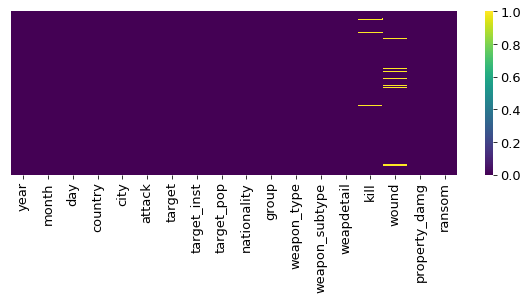

In [25]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [26]:
print(data.kill.isnull().sum(),data.wound.isnull().sum())

166 2050


In [27]:
#Create a dataframe to store the mean of kill and wound based on weapon_subtype
dd = data.groupby('weapon_subtype').mean()[['kill','wound']]
dd = dd.astype({'kill':int,'wound':int},inplace=True).reset_index()
dd.head()

,weapon_subtype,kill,wound
0,Arson/Fire,1,0
1,Automatic Weapon,3,2
2,Blunt Object,0,2
3,Dynamite/TNT,0,0
4,Explosive,2,66


In [28]:
#Replace the remaining null values in kill and wound by mean values
def impute_kill(cols):
    kill = cols[0]
    wp_sb = cols[1]
    if pd.isnull(kill):
        return int(dd[dd.weapon_subtype==wp_sb].kill)
    else: 
        return kill
def impute_wound(cols):
    wound = cols[0]
    wp_sb = cols[1]
    if pd.isnull(wound):
        return int(dd[dd.weapon_subtype==wp_sb].wound)
    else:
        return wound

In [29]:
data['kill']=data[['kill','weapon_subtype']].apply(impute_kill,axis=1)

In [30]:
data['wound']=data[['wound','weapon_subtype']].apply(impute_wound,axis=1)

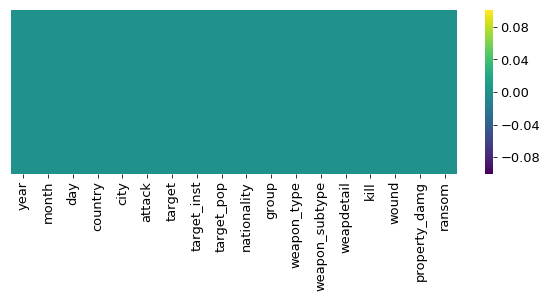

In [31]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Now we have neat and clear data

In [32]:
# Adding a new column casualties which shows the no. of people killed and wounded in a particular attack
data['casualties']= data['kill'] + data['wound']

### <a id='Some Basic Analysis on Global Terror Attacks'> 4. Some Basic Analysis on Global Terror Attacks</a>

In [33]:
mx=data['kill'].max()
print("Attack where maximum people were killed:")
data[data.kill==mx]

Attack where maximum people were killed:


,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
11065,2014,6,12,Iraq,Tikrit,Hostage Taking (Kidnapping),Military,Iraqi Armed Forces,Soldiers,Iraq,Islamic State of Iraq and the Levant (ISIL),Firearms,Unknown Gun Type,Unknown,1500.0,1.0,no record,0.0,1501.0


### Graphical Analysis

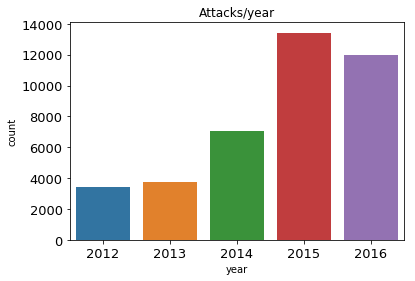

In [34]:
plt.title('Attacks/year')
sns.countplot(x=data.year)

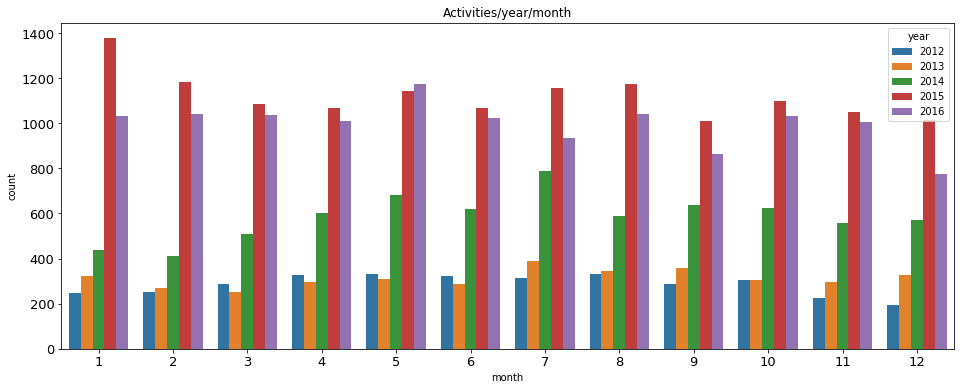

In [35]:
plt.figure(figsize=(16,6))
plt.title('Activities/year/month')
sns.countplot(x=data.month,hue=data.year)

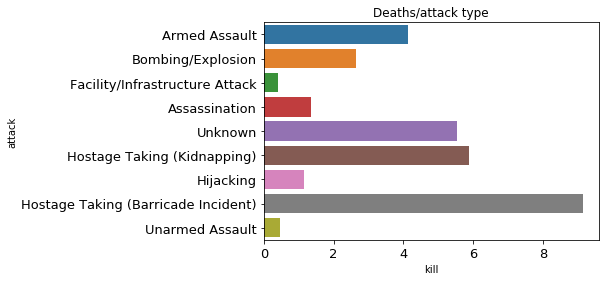

In [36]:
plt.title('Deaths/attack type')
sns.barplot(x=data.kill,y=data.attack,ci=None)

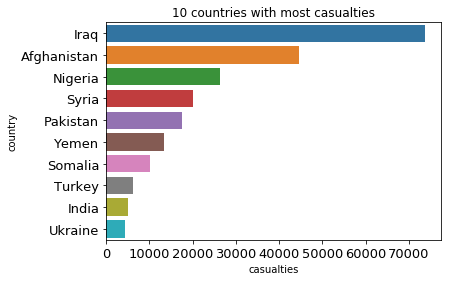

In [37]:
a,c=[],[]
for g,d in data.groupby('country'):
    if d.casualties.sum()>0:
        a.append(g)
        c.append(d.casualties.sum())
plt.title('10 countries with most casualties')
cc=pd.DataFrame(dict(casualties=c,country=a),columns=['casualties','country']).sort_values(ascending=False,by='casualties')[0:10]
sns.barplot(y=cc.country,x=cc.casualties)

#### Grouping data based on terrorist group

In [38]:
a,c,k,w=[],[],[],[]
for g,d in data.groupby('group'):
    if d.casualties.sum()>0:
        a.append(g)
        c.append(d.casualties.sum())
        k.append(d.kill.sum())
        w.append(d.wound.sum())
gc=pd.DataFrame(dict(casualties=c,group=a,kill=k,wound=w),columns=['casualties','group','kill','wound']).sort_values(ascending=False,by='casualties')[0:10]

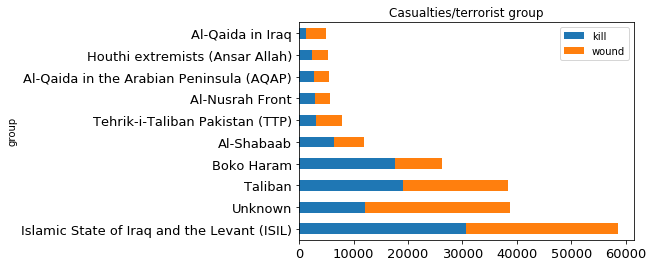

In [39]:
gc.plot.barh(x='group',y=['kill','wound'],stacked=True,title="Casualties/terrorist group")

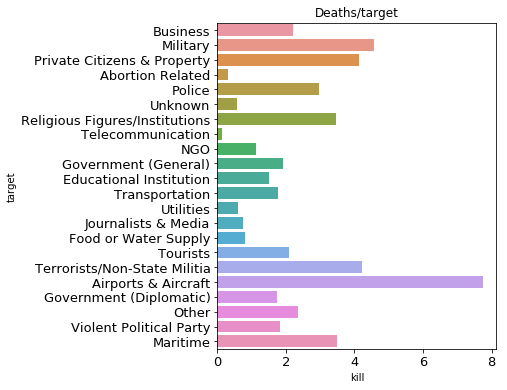

In [40]:
plt.figure(figsize=(5,6))
plt.title('Deaths/target')
sns.barplot(y=data.target,x=data.kill,ci=None)

### Crosstab

In [41]:
vc=data['group'].value_counts()[0:11].index
v1=data[data['group'].isin(vc)]
xattack=pd.crosstab(v1.group,v1.casualties,margins='All')

In [42]:
xattack.head()

casualties,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,430.0,444.0,502.0,520.0,536.0,583.0,670.0,1501.0,1503.0,All
group,,,,,,,,,,,,,,,,,,,,,
Al-Qaida in the Arabian Peninsula (AQAP),166,177,77,70,30,43,24,29,33,14,...,0,0,0,0,0,0,0,0,0,795
Al-Shabaab,307,416,206,149,133,100,71,56,45,33,...,0,0,0,0,0,0,0,0,0,1843
Boko Haram,239,149,147,140,100,78,65,56,36,51,...,0,0,0,0,0,0,0,0,0,1721
Houthi extremists (Ansar Allah),287,60,39,44,44,20,23,24,13,7,...,0,0,0,0,0,0,0,0,0,709
Islamic State of Iraq and the Levant (ISIL),447,267,194,181,210,179,170,133,100,103,...,0,1,1,1,0,1,1,1,1,3520


In [43]:
xattack=xattack[0:-1] # dropping All

Text(0.5,0.98,'% of Casualties/group')

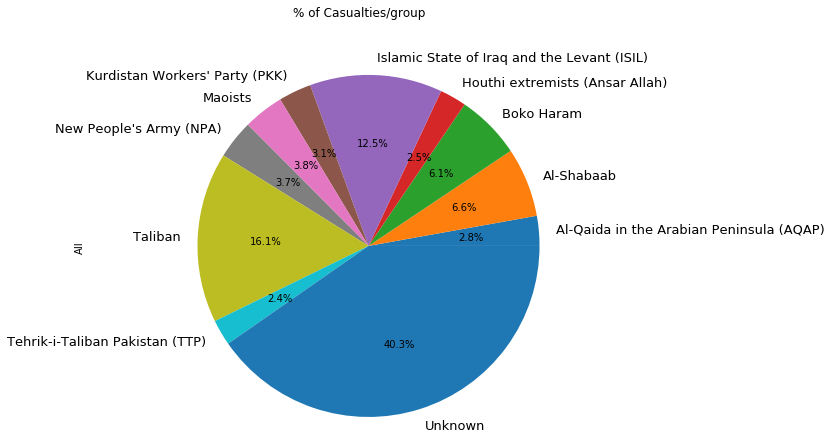

In [44]:
xattack.plot.pie(legend=False,y='All',figsize=(10,7),autopct='%1.1f%%') # auto percent
plt.axis('equal')
plt.suptitle('% of Casualties/group')

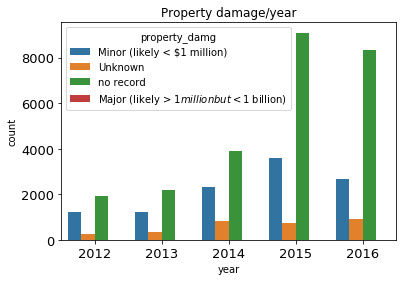

In [45]:
plt.title('Property damage/year')
sns.countplot(x=data.year,hue=data.property_damg)

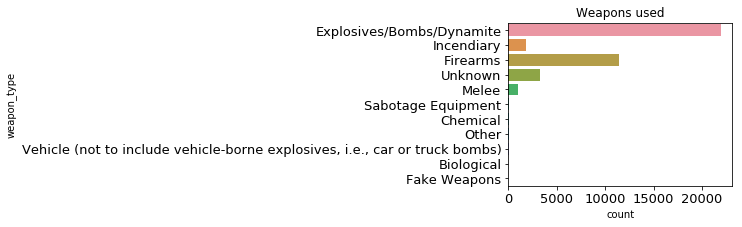

In [46]:
plt.figure(figsize=(4,3))
plt.title('Weapons used')
sns.countplot(y=data.weapon_type)

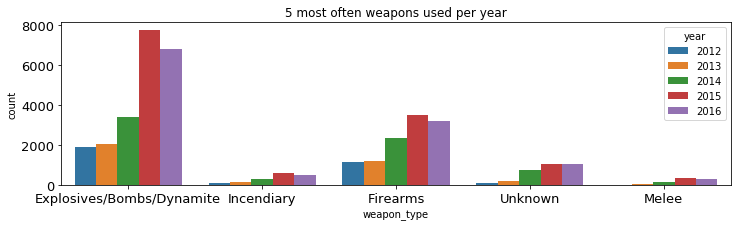

In [47]:
plt.figure(figsize=(12,3))
plt.title('5 most often weapons used per year')
wt=data[(data.weapon_type=='Explosives/Bombs/Dynamite')|(data.weapon_type=='Melee')|(data.weapon_type=='Unknown')\
        |(data.weapon_type=='Incendiary')|(data.weapon_type=='Firearms')]
sns.countplot(x=wt.weapon_type,hue=wt.year)

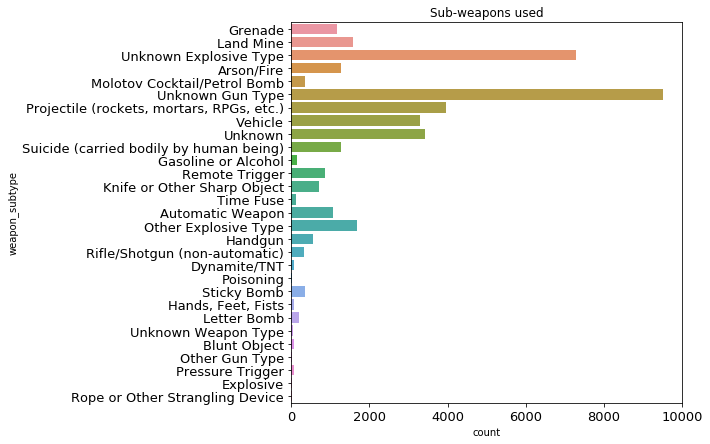

In [48]:
plt.figure(figsize=(7,7))
plt.title('Sub-weapons used')
sns.countplot(y=data.weapon_subtype)

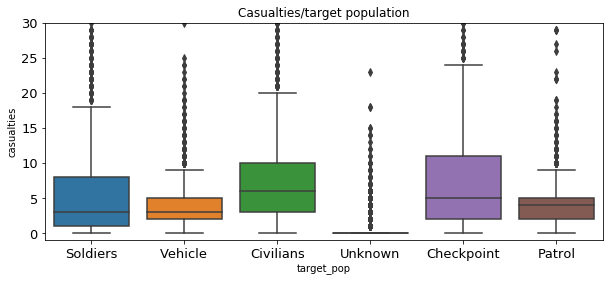

In [49]:
plt.figure(figsize=(10,4))
tc=data['target_pop'].value_counts()[0:6].index
n1=data[data['target_pop'].isin(tc)][['target_pop','casualties']]
plt.ylim(-1,30)
plt.title('Casualties/target population')
sns.boxplot(n1.target_pop,n1.casualties)

In [50]:
gc=data['group'].value_counts()[0:10].index
x=data[data['group'].isin(gc)]
xtab = pd.crosstab(x.year,x.group) 
xtab

group,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Boko Haram,Houthi extremists (Ansar Allah),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),Maoists,New People's Army (NPA),Taliban,Unknown
year,,,,,,,,,,
2012,192,205,384,0,0,121,162,83,785,0
2013,137,256,214,16,344,18,157,197,735,0
2014,270,608,429,104,976,55,243,270,978,0
2015,121,318,471,292,1052,324,257,314,1071,5958
2016,75,456,223,297,1148,352,259,165,964,5379


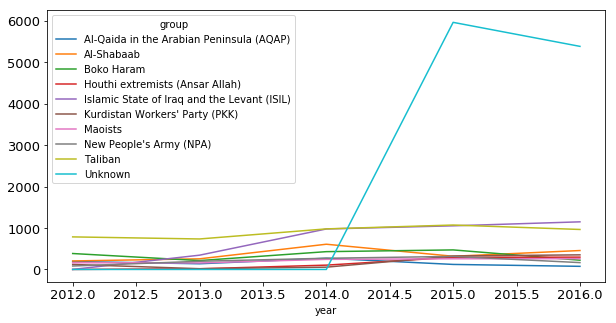

In [51]:
xtab.plot(figsize=(10,5))

### <a id='Terrorism in India'>5. Terrorism in India </a>

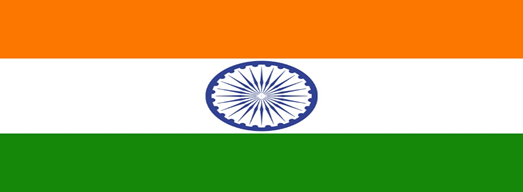

In [52]:
India = data[data['country']=='India']

### <a id='#History of Terrorism in India'>5.1 History of Terrorism in India </a>

Text(0.5,1,'Attacks/year')

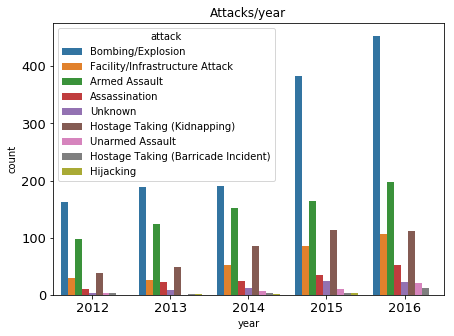

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(x=India.year,hue=India.attack)
plt.title('Attacks/year')

Bombing/Explosion topped in attack type followed by Armed Assault in each year

### <a id='#Most Active Terrorist group in India'>5.2 Most Active Terrorist group in India </a>

In [54]:
mx=India['kill'].max()
print("Attack where maximum people were killed:")
India[India.kill==mx]

Attack where maximum people were killed:


,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
20076,2015,4,11,India,Sukma district,Armed Assault,Police,Special Task Force (STF),Search Operation,India,Communist Party of India - Maoist (CPI-Maoist),Firearms,Automatic Weapon,Assault rifles and other heavy weapons were us...,42.0,25.0,no record,0.0,67.0


In [55]:
print("Number of Terrorist groups in India is",India['group'].nunique())

Number of Terrorist groups in India is 119


In [56]:
gc=India['group'].value_counts()[0:10].index
x=India['group'].isin(gc)

In [57]:
grp_cas = India[x][['group','casualties']].groupby('group').sum().reset_index()
grp_cas.head()

,group,casualties
0,Communist Party of India - Maoist (CPI-Maoist),655.0
1,Garo National Liberation Army,128.0
2,Hizbul Mujahideen (HM),282.0
3,Lashkar-e-Taiba (LeT),481.0
4,Maoists,1225.0


In [58]:
grp_cnt=India[x]['group'].value_counts().reset_index().rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt.head()

,group,count_of_attack
0,Maoists,1076
1,Unknown,710
2,Communist Party of India - Maoist (CPI-Maoist),317
3,Garo National Liberation Army,121
4,United Liberation Front of Assam (ULFA),93


In [59]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

,group,casualties,count_of_attack
4,Maoists,1225.0,1076
0,Communist Party of India - Maoist (CPI-Maoist),655.0,317
9,Unknown,603.0,710
3,Lashkar-e-Taiba (LeT),481.0,56
2,Hizbul Mujahideen (HM),282.0,71
5,National Democratic Front of Bodoland (NDFB),248.0,77
8,United Liberation Front of Assam (ULFA),237.0,93
1,Garo National Liberation Army,128.0,121
7,People's Liberation Army (India),114.0,60
6,National Socialist Council of Nagaland-Isak-Mu...,75.0,41


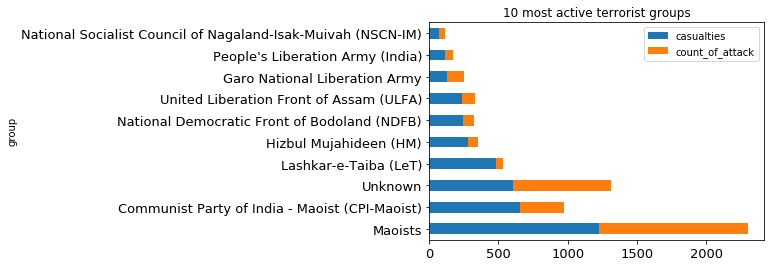

In [60]:
grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,title='10 most active terrorist groups')

* Maoists is the most active terrorist group in India
* LeT has caused greater casualities in less attacks

### <a id='#Most Affected City in India'>5.3 Most Affected City in India </a>

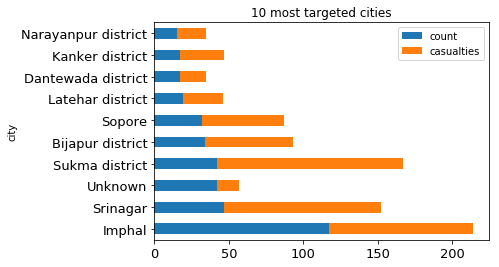

In [61]:
y=India['city'].value_counts()[0:10].index
x=India['city'].isin(y)

cc=India[x]['city'].value_counts().reset_index().rename(columns={'index':'city','city':'count'})\
.merge(India[x].groupby('city').sum()['casualties'].reset_index(),on='city')
cc.plot.barh(x='city',y=['count','casualties'],title='10 most targeted cities',stacked=True)

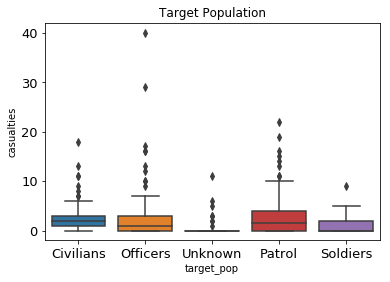

In [62]:
y=India['target_pop'].value_counts()[:5].index
n1=India[India['target_pop'].isin(y)][['target_pop','casualties']]
plt.title('Target Population')
sns.boxplot(x=n1.target_pop,y=n1.casualties)

### <a id='#Favourite Target of top 10 Terrorist Group in India'>5.4 Favourite Target of top 10 Terrorist Group in India </a>

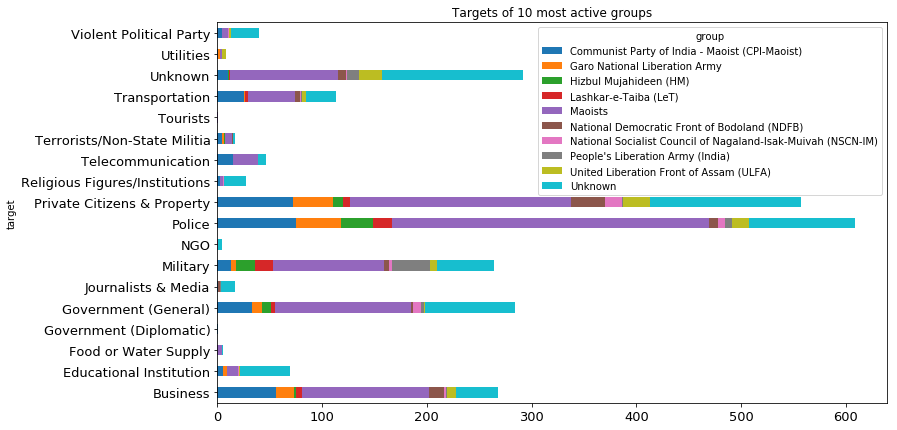

In [63]:
v1=India[India['group'].isin(gc)]
pd.crosstab(v1['target'],v1['group']).plot.barh(stacked=True,figsize=(12,7),title='Targets of 10 most active groups')

* Maoists mostly target Police, Private Citizens and Property, Business
* Private Citizen,Property and Police are damaged most

Text(0.5,0.98,'Weapons Used')

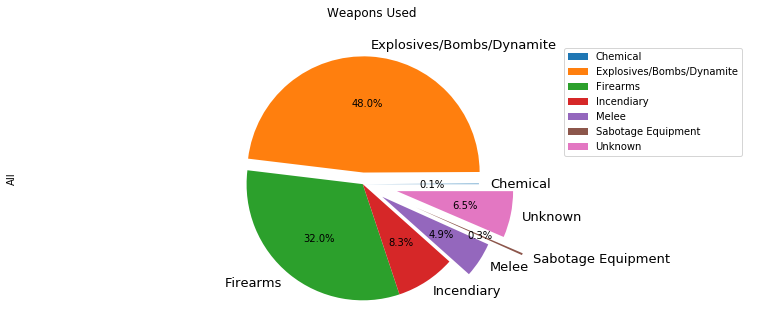

In [64]:
explode=(0.0, 0.1, 0.0, 0.0, 0.2, 0.5, 0.3) #anti clockwise
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-2]
xattack.plot.pie(y='All',figsize=(13,5),autopct='%1.1f%%',explode=explode)
plt.axis('equal')
plt.suptitle('Weapons Used')

### <a id='Terrorism in Pakistan'>6. Terrorism in Pakistan </a>

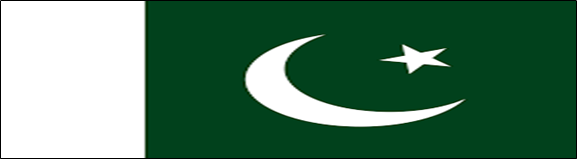

In [65]:
pak=data[data.country=='Pakistan']

Text(0.5,1,'Attacks/year')

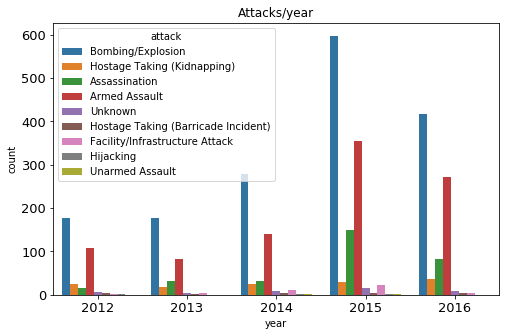

In [66]:
plt.figure(figsize=(8,5))
sns.countplot(x=pak.year,hue=pak.attack,)
plt.title("Attacks/year")

* Shows more than two fold rise in attacks in 2015, with a decrease in 2016 
* Terrorism in Pakistan show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault each year

In [67]:
mx=pak['kill'].max()
print("Attack where maximum people were killed:")
pak[pak.kill==mx]

Attack where maximum people were killed:


,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
15429,2014,12,16,Pakistan,Peshawar,Hostage Taking (Barricade Incident),Educational Institution,Pakistan Army,Army Public School,Pakistan,Tehrik-i-Taliban Pakistan (TTP),Explosives/Bombs/Dynamite,Suicide (carried bodily by human being),Unknown,158.0,121.0,Minor (likely < $1 million),0.0,279.0


** 10 Most Active Terrorist Groups with casualties**

In [68]:
grp_cas = pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)][['group','casualties']].groupby('group')\
.sum().reset_index()
grp_cas.sort_values(by='casualties',ascending=False)

,group,casualties
7,Tehrik-i-Taliban Pakistan (TTP),7798.0
9,Unknown,2111.0
5,Lashkar-e-Jhangvi,1866.0
8,United Baloch Army (UBA),673.0
4,Lashkar-e-Islam (Pakistan),576.0
2,Baloch Republican Army (BRA),573.0
3,Khorasan Chapter of the Islamic State,536.0
0,Baloch Liberation Army (BLA),435.0
1,Baloch Liberation Front (BLF),391.0
6,Sindhu Desh Liberation Army (SDLA),71.0


** Top 10 Terrorist Groups with attack count**

In [69]:
y=pak['group'].value_counts()[0:10].index
grp_cnt=pak[pak['group'].isin(y)]['group'].value_counts().reset_index().rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt.head()

,group,count_of_attack
0,Unknown,1371
1,Tehrik-i-Taliban Pakistan (TTP),679
2,Baloch Republican Army (BRA),233
3,Baloch Liberation Front (BLF),144
4,Baloch Liberation Army (BLA),97


In [70]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp.head()

,group,casualties,count_of_attack
7,Tehrik-i-Taliban Pakistan (TTP),7798.0,679
9,Unknown,2111.0,1371
5,Lashkar-e-Jhangvi,1866.0,87
8,United Baloch Army (UBA),673.0,78
4,Lashkar-e-Islam (Pakistan),576.0,77


Text(0.5,0,'count')

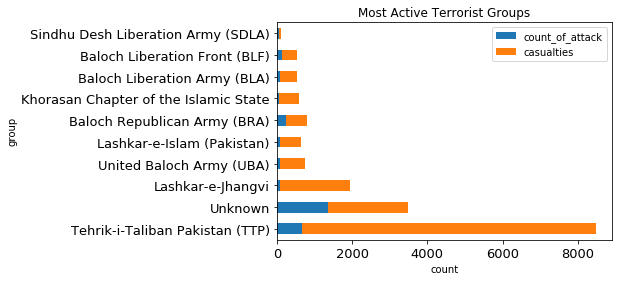

In [71]:
ax = grp.plot.barh(x='group',y=['count_of_attack','casualties'],stacked=True,title="Most Active Terrorist Groups")
ax.set_xlabel('count')

Tehrik-i-Taliban Pakistan (TTP) and others caused great human loss in less attacks. It proves that they have been very successful.

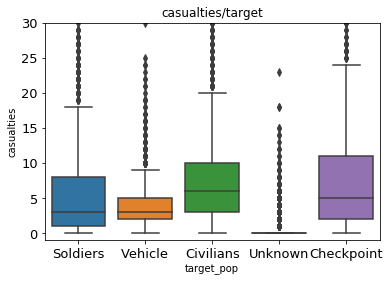

In [72]:
y=data['target_pop'].value_counts()[0:5].index
n1=data[data['target_pop'].isin(y)][['target_pop','casualties']]
plt.ylim(-1,30)
plt.title('casualties/target')
sns.boxplot(x=n1.target_pop,y=n1.casualties)

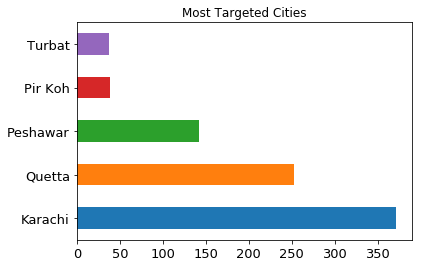

In [73]:
y=pak['city'].value_counts()[0:5].index
pak[pak['city'].isin(y)]['city'].value_counts().plot.barh(title="Most Targeted Cities")

Karachi is the most targeted city, might be because it is the most populous city, home to two largest seaports and the most busiest airport of the Pakistan, Jinnah International Airport. It is also the premier industrial and financial centre and most cosmopolitan city of the country. It was also the first capital of the country.

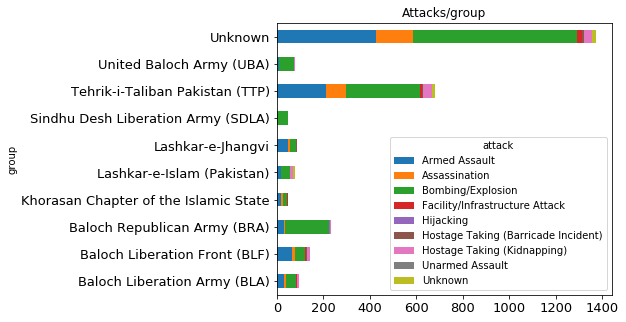

In [74]:
y=pak['group'].value_counts()[0:10].index
p1=pak[pak['group'].isin(y)]
pd.crosstab(p1['group'],p1['attack']).plot.barh(stacked=True,figsize=(6,5),title="Attacks/group")

* Bombing/explosion and armed assault has been extensively used by groups

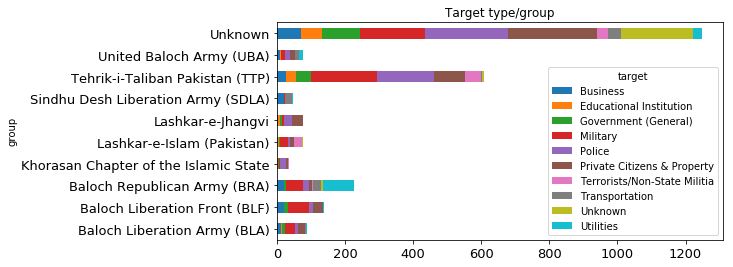

In [75]:
q1=p1[p1['target'].isin(p1['target'].value_counts()[0:10].index)]
pd.crosstab(q1['group'],q1['target']).plot.barh(stacked=True,figsize=(8,4),title='Target type/group')

* Tehrik-i-Taliban Pakistan (TTP) seem to target the defence force of the country. 
* Military system,private citizens and property are attacked almost by all groups.

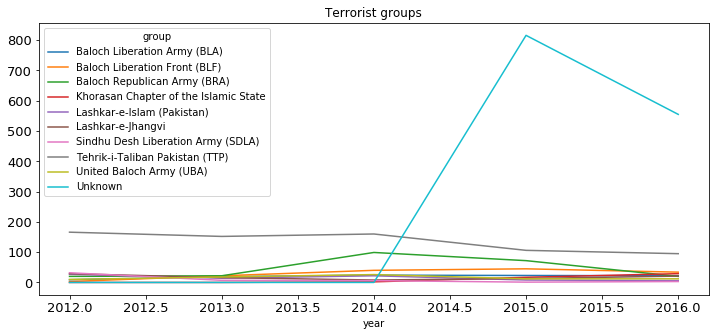

In [76]:
pd.crosstab(p1['year'],p1['group']).plot(figsize=(12,5),title='Terrorist groups')

* The TTP has been the most active group since 2012 until 2014 where it showed a decrease. 
* The Unknown groups show sharp rise in their attacks since 2014.

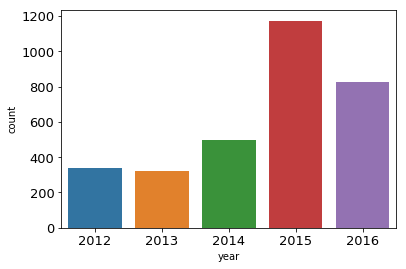

In [77]:
sns.countplot(x=pak.year)

2015 was the worst year for the country with attacks more than double in past three years

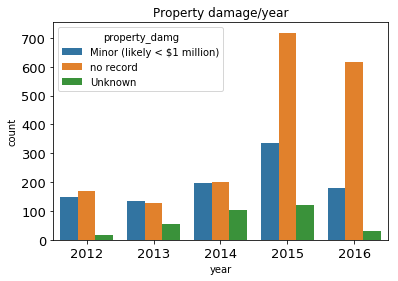

In [78]:
plt.title('Property damage/year')
sns.countplot(x=pak.year,hue=pak.property_damg)

In [79]:
v1=pak[pak['weapon_type'].isin(pak['weapon_type'].value_counts().index)]
v1.weapon_type.nunique()

6

In [80]:
p1=pak[pak.nationality=='Pakistan'].groupby('group')
print('Number of terrorist groups from Pakistan itself :',len(list(p1)))

Number of terrorist groups from Pakistan itself : 58


### <a id='Terrorism in Afghanistan'>7. Terrorism in Afghanistan </a>

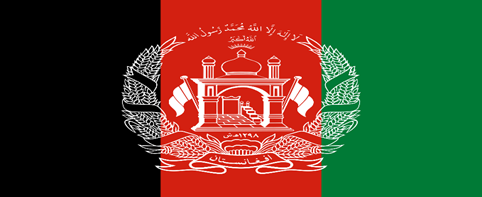

In [81]:
Afghanistan=data[data['country']=='Afghanistan']

In [82]:
print("Terrorist groups in Afghanistan:",Afghanistan['group'].nunique())

Terrorist groups in Afghanistan: 15


Text(0.5,1,'History of Terrorism in Afghanistan')

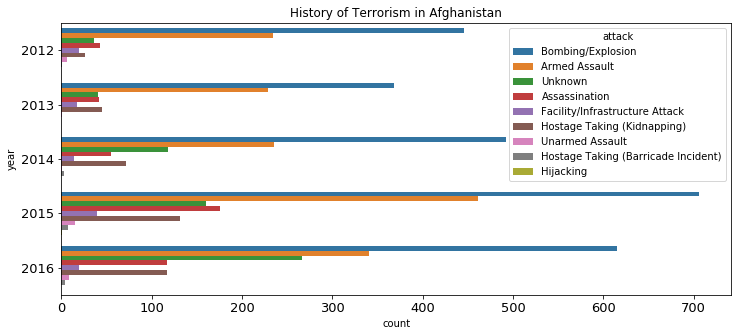

In [83]:
plt.figure(figsize=(12,5))
sns.countplot(y=Afghanistan.year,hue=Afghanistan.attack)
plt.title('History of Terrorism in Afghanistan')

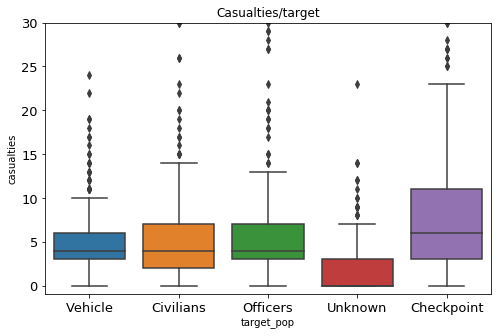

In [84]:
plt.figure(figsize=(8,5))
y=Afghanistan['target_pop'].value_counts()[0:5].index
n1=Afghanistan[Afghanistan['target_pop'].isin(y)][['target_pop','casualties']]
plt.ylim(-1,30)
plt.title('Casualties/target')
sns.boxplot(x=n1.target_pop,y=n1.casualties)

### Most Affected City In Afghanistan

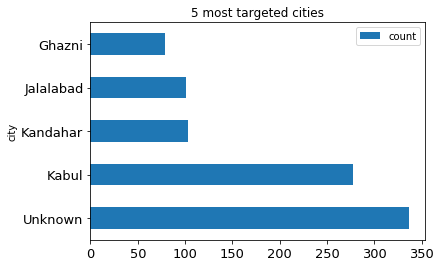

In [85]:
y=Afghanistan['city'].value_counts()[0:5].index
Afghanistan[Afghanistan['city'].isin(y)]['city'].value_counts().reset_index().rename(columns={'index':'city','city':'count'})\
.plot.barh(x='city',title='5 most targeted cities')

### Favourite Target of top 10 Terrorist Group in Afghanistan

Text(0.5,1,'Target of top 5 groups')

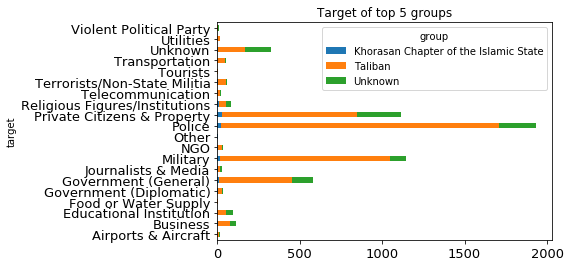

In [86]:
y=Afghanistan['group'].value_counts()[0:3].index
v1=Afghanistan[Afghanistan['group'].isin(y)]
pd.crosstab(v1['target'],v1['group']).plot.barh(stacked=True)
plt.title('Target of top 5 groups')

In [87]:
Afghanistan.weapon_type.nunique()

9

### <a id='Terrorism in Iraq'>8. Terrorism in Iraq </a>

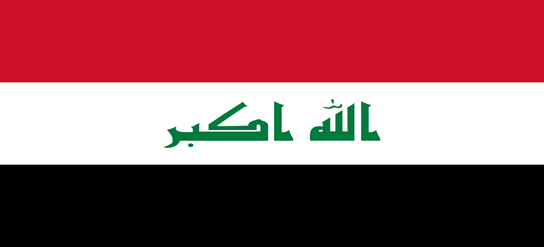

In [88]:
Iraq = data[data['country']=='Iraq']

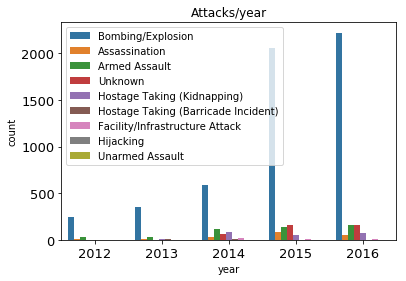

In [89]:
sns.countplot(x=Iraq.year,hue=Iraq.attack)
plt.title('Attacks/year')
plt.legend(loc=2)

Almost a 3-fold rise in attacks after 2015.

### Most Active Terrorist group in Iraq

In [90]:
mx=Iraq['kill'].max()
print("Attack where maximum people were killed:")
Iraq[Iraq.kill==mx]

Attack where maximum people were killed:


,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
11065,2014,6,12,Iraq,Tikrit,Hostage Taking (Kidnapping),Military,Iraqi Armed Forces,Soldiers,Iraq,Islamic State of Iraq and the Levant (ISIL),Firearms,Unknown Gun Type,Unknown,1500.0,1.0,no record,0.0,1501.0


In [91]:
print("Terrorist groups in Iraq is",Iraq['group'].nunique())

Terrorist groups in Iraq is 19


** 5 Most Active Terrorist Groups with casualties**

In [92]:
gg=Iraq['group'].value_counts()[0:5].index
grp_cas = Iraq[Iraq['group'].isin(gg)][['group','casualties']].groupby('group').sum().reset_index()
grp_cas

,group,casualties
0,Al-Naqshabandiya Army,419.0
1,Al-Qaida in Iraq,4846.0
2,Islamic State of Iraq and the Levant (ISIL),46124.0
3,Muslim extremists,438.0
4,Unknown,20738.0


** 5 Most Active Terrorist Groups with attack count**

In [93]:
grp_cnt=Iraq[Iraq['group'].isin(gg)]['group'].value_counts().reset_index().rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

,group,count_of_attack
0,Unknown,3367
1,Islamic State of Iraq and the Levant (ISIL),2959
2,Al-Qaida in Iraq,359
3,Al-Naqshabandiya Army,34
4,Muslim extremists,25


In [94]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

,group,casualties,count_of_attack
2,Islamic State of Iraq and the Levant (ISIL),46124.0,2959
4,Unknown,20738.0,3367
1,Al-Qaida in Iraq,4846.0,359
3,Muslim extremists,438.0,25
0,Al-Naqshabandiya Army,419.0,34


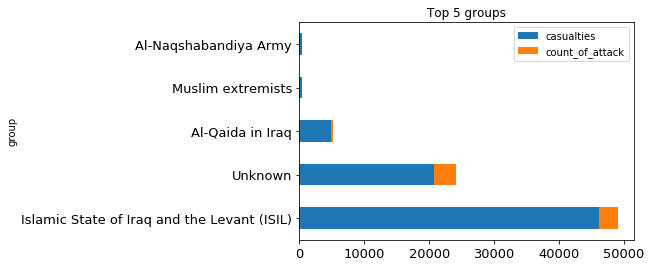

In [95]:
grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,title='Top 5 groups')

* **ISIL is the most active group in Iraq**
* **AI-Qaida has caused greater no. of casuality in less no. of attacks**

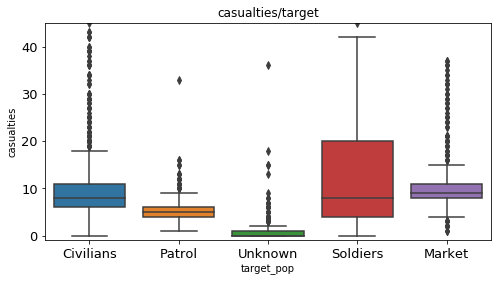

In [96]:
plt.figure(figsize=(8,4))
y=Iraq['target_pop'].value_counts()[0:5].index
n1=Iraq[Iraq['target_pop'].isin(y)][['target_pop','casualties']]
plt.ylim(-1,45)
plt.title('casualties/target')
sns.boxplot(x=n1.target_pop,y=n1.casualties)

### Most Affected City in Iraq

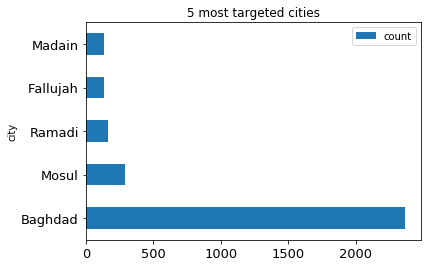

In [97]:
y=Iraq['city'].value_counts()[0:5].index
Iraq[Iraq['city'].isin(y)]['city'].value_counts().reset_index()\
.rename(columns={'index':'city','city':'count'}).plot.barh(x='city',title='5 most targeted cities')

Baghdad is the most targeted city

### Targets of top 5 Terrorist Groups 

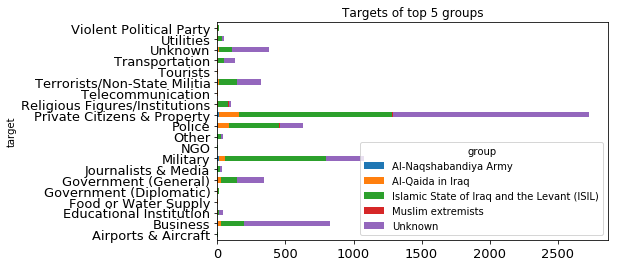

In [98]:
v1=Iraq[Iraq['group'].isin(gg)]
pd.crosstab(v1['target'],v1['group']).plot.barh(stacked=True,figsize=(7,4),title='Targets of top 5 groups')

* ISIL mostly target Police, Private Citizen and Property,Military and Business
* Private Citizen and Property were mostly damaged by these groups

In [99]:
Iraq.weapon_type.nunique()

8

### <a id='Terrorism in Syria'>10. Terrorism in Syria </a>

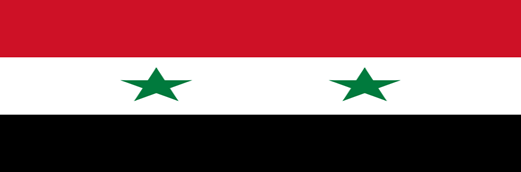

In [100]:
Syria = data[data['country']=='Syria']

Text(0.5,1,'Attacks/year')

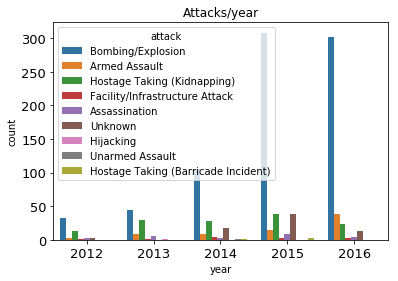

In [101]:
sns.countplot(x=Syria.year,hue=Syria.attack)
plt.title('Attacks/year')

In [102]:
mx=Syria['kill'].max()
print("Attack where maximum people were killed:")
Syria[Syria.kill==mx]

Attack where maximum people were killed:


,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
12805,2014,8,19,Syria,Unknown,Hostage Taking (Kidnapping),Military,Syrian Air and Air Defense Forces,Tabqa Airbase,Syria,Islamic State of Iraq and the Levant (ISIL),Explosives/Bombs/Dynamite,"Projectile (rockets, mortars, RPGs, etc.)",Unknown,517.0,3.0,Unknown,0.0,520.0


In [103]:
print("The no. of Terrorist groups in Syria:",Syria['group'].nunique())

The no. of Terrorist groups in Syria: 47


** 5 Most Active Terrorist Groups with casualties**

In [104]:
y=Syria['group'].value_counts()[0:5].index
grp_cas = Syria[Syria['group'].isin(y)][['group','casualties']].groupby('group').sum().reset_index()
grp_cas

,group,casualties
0,Al-Nusrah Front,5357.0
1,Free Syrian Army,674.0
2,Islamic State of Iraq and the Levant (ISIL),9090.0
3,Muslim extremists,640.0
4,Unknown,1936.0


** 5 Most Active Terrorist Groups with attack count**

In [105]:
grp_cnt=Syria[Syria['group'].isin(y)]['group'].value_counts().reset_index().rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

,group,count_of_attack
0,Islamic State of Iraq and the Levant (ISIL),386
1,Unknown,206
2,Al-Nusrah Front,201
3,Free Syrian Army,80
4,Muslim extremists,57


In [106]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

,group,casualties,count_of_attack
2,Islamic State of Iraq and the Levant (ISIL),9090.0,386
0,Al-Nusrah Front,5357.0,201
4,Unknown,1936.0,206
1,Free Syrian Army,674.0,80
3,Muslim extremists,640.0,57


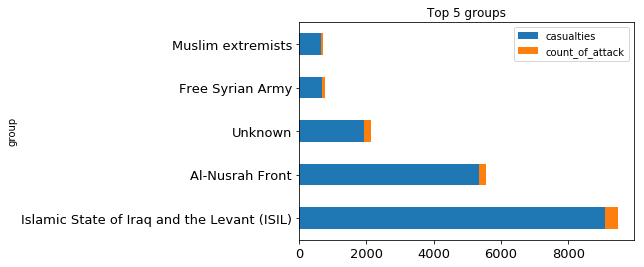

In [107]:
grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,title='Top 5 groups')

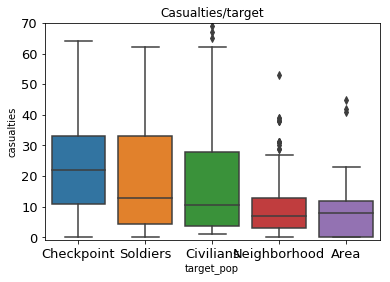

In [108]:
plt.figure(figsize=(6,4))
y=Syria['target_pop'].value_counts()[0:5].index
n1=Syria[Syria['target_pop'].isin(y)][['target_pop','casualties']]
plt.ylim(-1,70)
plt.title('Casualties/target')
sns.boxplot(x=n1.target_pop,y=n1.casualties)

### Most Affected City in Syria

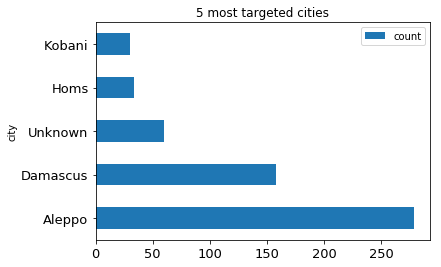

In [109]:
y=Syria['city'].value_counts()[0:5].index
Syria[Syria['city'].isin(y)]['city'].value_counts().reset_index().rename(columns={'index':'city','city':'count'}).plot.barh(x='city',title='5 most targeted cities')

Aleppo is the most affected city. Attacks also occured in capital Damascus.

In [110]:
Syria.weapon_type.nunique()

9

Text(0.5,1,'Targets of top 5 groups')

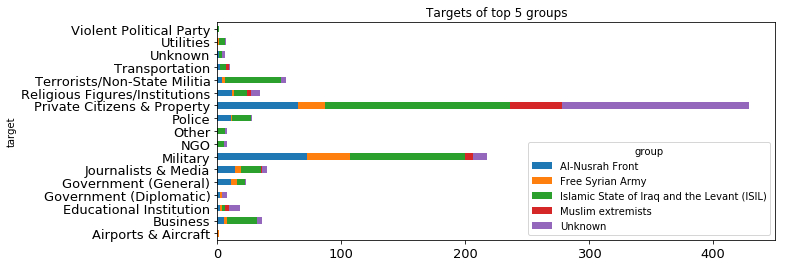

In [111]:
v1=Syria[Syria['group'].isin(Syria['group'].value_counts()[0:5].index)]
pd.crosstab(v1['target'],v1['group']).plot.barh(stacked=True,figsize=(10,4))
plt.title('Targets of top 5 groups')

### <a id='Terrorism in Nigeria'>10. Terrorism in Nigeria </a>

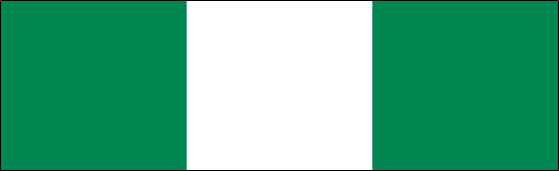

In [112]:
nig=data[data.country=='Nigeria']

In [113]:
mx=nig['kill'].max()
print("Attack where maximum people were killed:")
nig[nig.kill==mx]

Attack where maximum people were killed:


,year,month,day,country,city,attack,target,target_inst,target_pop,nationality,group,weapon_type,weapon_subtype,weapdetail,kill,wound,property_damg,ransom,casualties
10081,2014,5,5,Nigeria,Gamboru Ngala,Armed Assault,Private Citizens & Property,Gamboru Ngala Town,Town,Nigeria,Boko Haram,Explosives/Bombs/Dynamite,"Projectile (rockets, mortars, RPGs, etc.)",Rocket-propelled grenades and automatic firear...,315.0,3.0,Unknown,0.0,318.0


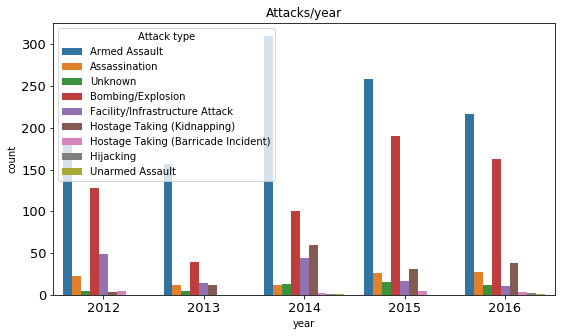

In [114]:
plt.figure(figsize=(9,5))
sns.countplot(x=nig.year,hue=nig.attack)
plt.title("Attacks/year")
plt.legend(title='Attack type',loc=2)

* After 2014 there has been slight decrease in attacks. 2013 saw comparitively less attacks among others
* Armed assault extensively used

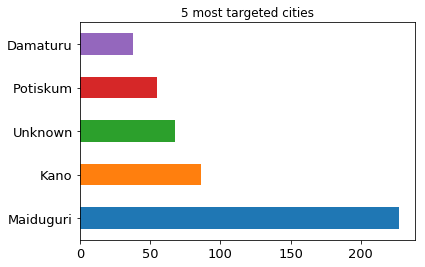

In [115]:
y=nig['city'].value_counts()[0:5].index
nig[nig['city'].isin(y)]['city'].value_counts().plot.barh(title="5 most targeted cities")

Maiduguri is the epicentre of most attacks.

In [116]:
print("The no. of Terrorist groups in Nigeria:",nig['group'].nunique())

The no. of Terrorist groups in Nigeria: 25


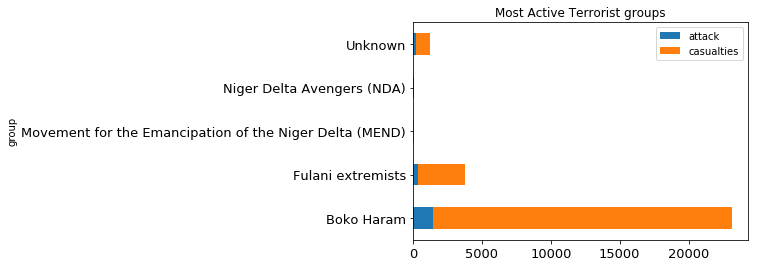

In [124]:
y=nig['group'].value_counts()[0:5].index
x=nig[nig['group'].isin(y)][['group','casualties']].groupby('group').sum().merge(nig['group'].value_counts().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.plot.barh(x='group',y=['attack','casualties'],stacked=True,title="Most Active Terrorist groups")

Boko Haram is the most successful terrorist group, followed by Fulani extremists. 

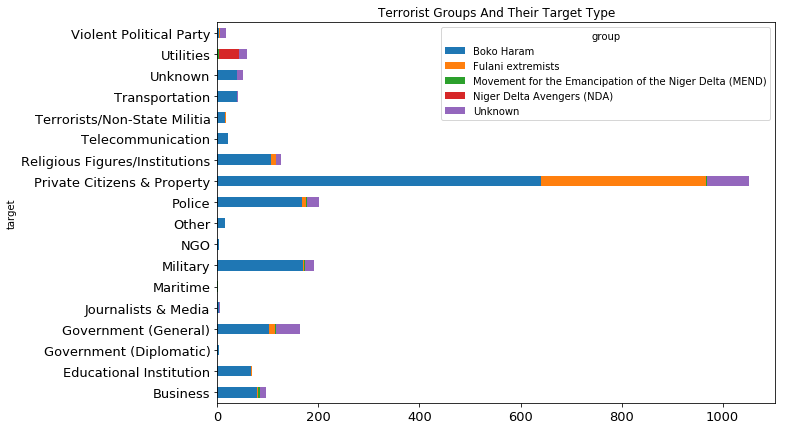

In [118]:
n1=nig[nig['group'].isin(y)]
pd.crosstab(n1['target'],n1['group']).plot.barh(stacked=True,figsize=(10,7),title='Terrorist Groups And Their Target Type')

Boko Haram and Fulani extremists have majorly attacked private citizens and property. Military,police and utilities are victomized too.

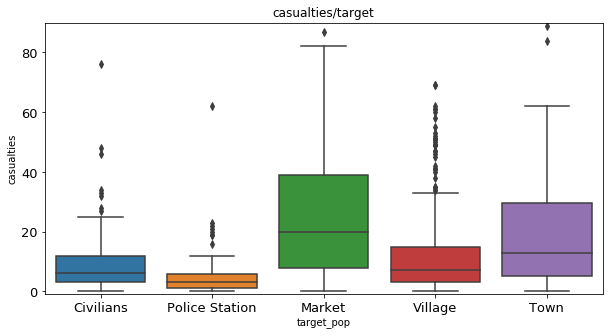

In [119]:
plt.figure(figsize=(10,5))
y=nig['target_pop'].value_counts()[0:5].index
n1=nig[nig['target_pop'].isin(y)][['target_pop','casualties']]
plt.ylim(-1,90)
plt.title('casualties/target')
sns.boxplot(x=n1.target_pop,y=n1.casualties)

(0, 1200)

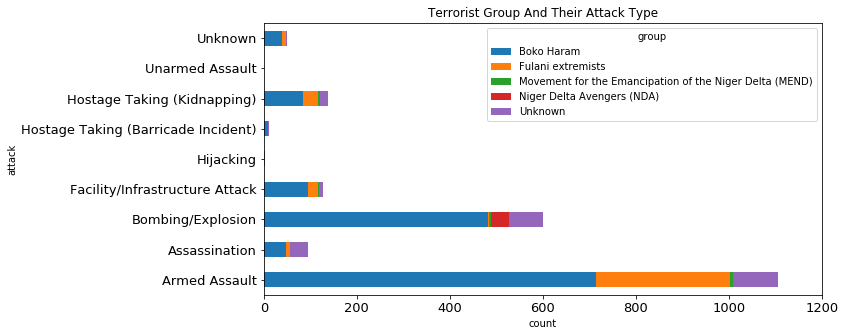

In [120]:
n1=nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]
pd.crosstab(n1['attack'],n1['group']).plot.barh(stacked=True,figsize=(10,5))
plt.xlabel('count')
plt.title('Terrorist Group And Their Attack Type')
plt.xlim(0,1200)

Armed assault and bombing/explosion extensively used by Boko Haram.

In [121]:
nig.weapon_type.nunique()

6

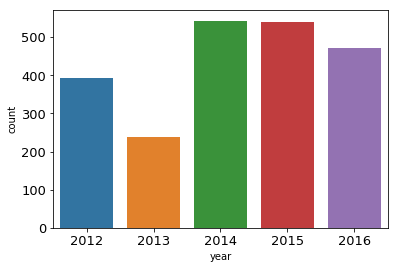

In [122]:
sns.countplot(x=nig.year)

Text(0.5,1,'Attacks/group')

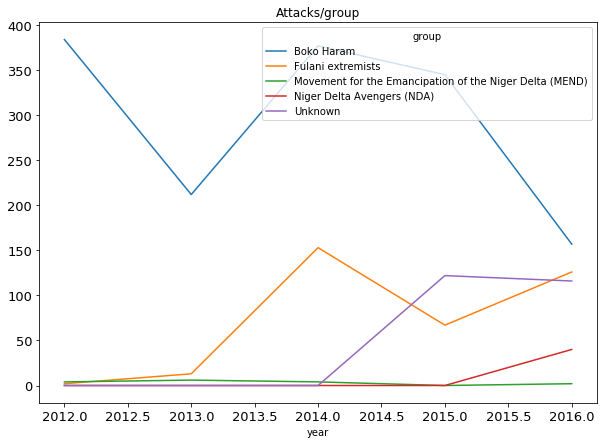

In [125]:
x=nig[nig['group'].isin(y)]
pd.crosstab(x['year'],x['group']).plot(figsize=(10,7))
plt.title('Attacks/group')

* Boko Haram showed sharp decrease in their attacks in 2013, then a rise next year, then again a slight fall in 2015, then a steep fall in 2016. 
* Fulani extremists suddenly came into existence in 2014, going down, then up, after that.
* Niger Delta Avengers came into limelight in 2016
* Hence there is no consistency in the attack number by all groups 

In [ ]:
sns.countplot(x=nig.year,hue=nig.property_damg)
plt.legend(loc=2)

Major property damage occured in 2014 